# Rubik's Snakes

## Objet du problème

Un [*Rubik's snake*](https://fr.wikipedia.org/wiki/Rubik%27s_Snake) $s$ est donné ; 
en *notation officielle*, $s=$ `'1R1-2L3-2R3-3L1-3R1'` par exemple, ou en *notation simplifiée*, $s=$ `'113310'` même exemple, sachant que le dernier chiffre, ici `0`, n'est pas significatif (sauf si le jeu est cyclique).

On se propose 

- de calculer la notation simplifiée du jeu s'il est donné en notation officielle ;
- de déterminer si le jeu est physiquement réalisable et s'il est cyclique (dans l'exemple précédent : oui et non) ;
- et d'en obtenir une représentation graphique ; exemple :

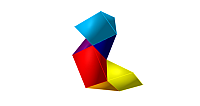


## Méthode

On utilise SageMath plutôt que Python pour profiter de ses  possibilités d'animation des images 3D.


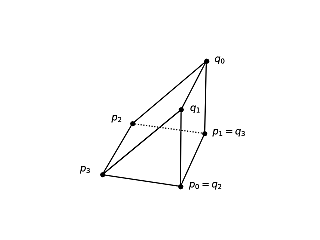

Au départ, le jeu est déployé en ligne droite. On effectue les rotations voulues de gauche à droite tout en lisant le mot $s$ (en notation simplifiée).  
Chaque prisme $P$ a trois faces carrées : une grande et deux petites. appelons *face d'entrée* la petite face carrée de gauche et *face de sortie* la petite face carrée de droite (c'est la face d'entrée du prisme suivant).  
On représente un prisme par les 4 sommets $(p_0,p_1,p_2,p_3)$ de sa face d'entrée, ordonnés de manière que $[p_0,p_1]$ soit l'arête intersection des 2 petites faces carrées et que les deux points $q_{0,1}=p_{1,0}+(p_1-p_0)\wedge(p_3-p_0)$ forment l'arête parallèle à $[p_0,p_1]$  de la face de sortie (ces arêtes sont supposées de longueur $1$).  
Ainsi $(q_0,q_1,q_2=p_0,q_3=p_1)$ représente le prisme $Q$ situé après $P$ (avant toute rotation) ; et une rotation de $Q$ par rapport à $P$ est une permutation circulaire sur les $q_i$.est contenu 

Le jeu est cyclique si, à une rotation près, la face de sortie du dernier prisme coïncide avec la face d'entrée du premier.

Noter que chaque prisme est contenu dans un carré comme sur la figure suivante

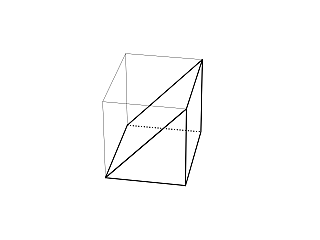

et que 2 prismes s'intersectent (le jeu n'est alors pas réalisable) s'ils partagent le même cube, à moins que les 2 prismes soient différents et qu'ils partagent la même grande face carrée (ils occupent alors tout le cube).




## Implémentation

In [4]:
import numpy as np

colors2 = [Color('#5770B7'), Color('#43B3A3')]
colors7 = ["yellow", "orange", "red", "purple", "darkblue", "deepskyblue", "lightgreen"]

class RubikSnake:

    def __init__(self, s):
        
        def rotation(m): # renvoie la face m tournée de pi/2
            return np.array([m[3], m[0], m[1], m[2]])
        
        if '-' in s:
            # s est en notation officielle '1R1-2L3-2R3-3L1-3R1- ..'
            u = list(map(lambda t: (int(t[:-2]),t[-2],int(t[-1])), s.split('-')))
            n = max([t[0] for t in u])
            t = list('0' * 2 * n)
            for k, d, c in u:
                if d == 'R':
                    t[2 * k - 2] = str(c)
                else:
                    t[2 * k - 3] = str(4 - c)
            self.s = ''.join(t)
        else:
            # s est déjà en notation simplifiée '11331 ..'
            self.s = s
            
        m0 = np.array([[1,0,0],[1,1,0],[0,1,0],[0,0,0]]) # 1ere face
        m = m0            # face courante
        self.prismes = [] # liste des prismes
        for i, k in enumerate(self.s):
            aux =  m[1] + np.cross(m[1] - m[0], m[3] - m[0])
            m_succ = np.array([aux, aux + m[0] - m[1], m[0], m[1]]) # face suivante
            self.prismes.append([m[0], m[1], m[2], m[3], m_succ[0], m_succ[1]])
            m = m_succ
            for _ in range(int(k)): 
                m = rotation(m)
        self.cyclique = False
        for i in range(4):
            if (m == m0).all(): 
                self.cyclique = True
                self.s = self.s[:-1] + str(mod(int(self.s[-1]) + i, 4))
            m = rotation(m)
            
    def realisable(self):
        
        # Pour chaque prisme, calcul du centre du cube le contenant
        prismes = [(p, p[2] + p[3] + p[4] + p[5]) for p in self.prismes]
        
        for i, (p, g) in enumerate(prismes):
            for i1, (p1, g1) in enumerate(prismes[:i]):
                if (g == g1).all() and (p[0] + p[1] + p1[0] + p1[1] != g).any():
                    return False
        return True
        
    def plot(self, colors = colors7, dilatation = 1., theta = 0., **kwargs):
        
        def dilate(l):
            if dilatation >= 1.:
                return l
            else:
                g = sum(l) / len(l)
                return list(map(lambda v: g + dilatation * (v - g), l))
        
        sum([Polyhedron(vertices = dilate(p)).plot(
                color = colors[mod(i,len(colors))], **kwargs
                   ).rotate([1,0,0], theta) 
                         for i, p in enumerate(self.prismes)]).show(frame = False, isLight = False)
   
    def all(self, **kwargs):
        print(self.s, 'est' if self.cyclique else "n'est pas",'cyclique')
        print(self.s, 'est' if self.realisable() else "n'est pas",'realisable')
        self.plot(**kwargs)
            

In [5]:
ball = RubikSnake('1R1-2L3-2R3-3L1-3R1-4L1-4R1-5L3-5R3-12R3-12L3-11R3-11L3-10R1-10L1-9R1-9L1-8R3-8L3-7R1-6R3-6L3-7L1')
ball.all()

113313113133113313113133 est cyclique
113313113133113313113133 est realisable


Graphics3d Object

In [6]:
pave = RubikSnake('000020020000220002200022')
pave.all(theme = 'dark')

000020020000220002200022 est cyclique
000020020000220002200022 est realisable


Graphics3d Object

In [7]:
s = '00000222000'
for i in [8,len(s)]:
    RubikSnake(s[:i]).all(colors = colors2, dilatation=.8, alpha=.8)

00000222 n'est pas cyclique
00000222 est realisable


Graphics3d Object

00000222000 n'est pas cyclique
00000222000 n'est pas realisable


Graphics3d Object

In [8]:
s = '01113133131131331311313330020013'\
    '00000031000000310000001300000013'\
    '00220310000132110013020200310022'\
    '03100001300001300003121102022011'\
    '00130013003100130031003100112130'\
    '00033231000000132110000310000310'\
    '00220000130000003100000031002022'\
    '0220312332130020'
# 240 prismes
RubikSnake(s).plot()

Graphics3d Object

In [9]:
RubikSnake('3000300120110001003101101332303001300332303302').all()

3000300120110001003101101332303001300332303302 est cyclique
3000300120110001003101101332303001300332303302 est realisable


Graphics3d Object

In [10]:
RubikSnake('2L2-3R2-5L2-6L1-7L2-8L3-9L2-10R2-12L2').all(theta = pi/2)

020020020302010200200200 n'est pas cyclique
020020020302010200200200 est realisable


Graphics3d Object

In [11]:
RubikSnake('1R2-2L2-3R3-3L2-4L1-4R3-5L3-5R3-6R1-6L3-7L1-7R1-8R3-8L1-9L3-9R2-10R2-12L2').all()

220233313113133120200200 n'est pas cyclique
220233313113133120200200 est realisable


Graphics3d Object

In [12]:
RubikSnake('1R3-3L2-4R3-3R2-5R1-5L2-6R3-7L2-7R3-6L2-8R1-8L2-9R3-11L2-12R1-9L2').all()

300220321232321230020012 est cyclique
300220321232321230020012 est realisable


Graphics3d Object